In [ ]:
#Machine Learning homework 2
#Authors: Jeffrey Cabrera & Kamrul Alam

In [285]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



In [286]:
breast_cancer=load_breast_cancer()
outputs = breast_cancer.target
data = breast_cancer.data

In [287]:
##adding leading 1s to feature matrix
data=np.insert(data, 0, 1, axis=1)


In [288]:
##split the feature matrix and the target matrix
x_train, x_test, y_train, y_test = train_test_split(data, outputs, test_size=0.20)

In [289]:
##acquire WLIN from training 
x_d = np.matmul(np.linalg.inv(np.matmul(np.transpose(x_train),x_train)),np.transpose(x_train))
wlin = np.matmul(x_d,y_train)

In [295]:
#determine accuracy
yp = np.dot(x_test, wlin)
for i in range(len(yp)):
    if yp[i] < 0.5:
        yp[i] =0
    else:
        yp[i] = 1
count = 0
for i in range(len(yp)):
    print("prediction = " , int(yp[i]), " actual = ", y_test[i] )
    if yp[i] == y_test[i]:
        count +=1
print("Accuracy = ", count / len(y_test) * 100,"%")

prediction =  0  actual =  0
prediction =  1  actual =  1
prediction =  0  actual =  0
prediction =  0  actual =  0
prediction =  0  actual =  0
prediction =  1  actual =  1
prediction =  1  actual =  1
prediction =  0  actual =  0
prediction =  0  actual =  0
prediction =  1  actual =  1
prediction =  1  actual =  1
prediction =  0  actual =  0
prediction =  0  actual =  0
prediction =  1  actual =  1
prediction =  1  actual =  1
prediction =  1  actual =  1
prediction =  1  actual =  1
prediction =  1  actual =  1
prediction =  1  actual =  1
prediction =  1  actual =  0
prediction =  1  actual =  1
prediction =  1  actual =  1
prediction =  1  actual =  1
prediction =  1  actual =  1
prediction =  1  actual =  0
prediction =  1  actual =  0
prediction =  1  actual =  0
prediction =  1  actual =  1
prediction =  0  actual =  0
prediction =  0  actual =  0
prediction =  1  actual =  1
prediction =  1  actual =  1
prediction =  0  actual =  0
prediction =  0  actual =  0
prediction =  

In [296]:
N = x_test.shape[0]
d = x_test.shape[1]
noise_level = (np.linalg.norm(np.dot(x_test,wlin)-y_test) **2)/N
print(noise_level)

0.06170949653811711


84
84
84


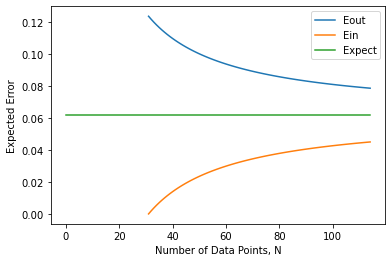

In [307]:
Ein = []
Eout = []
noise= []
for i in range(d,N+1):
    Eout.append((np.dot(noise_level,(1 + d/i))))
    Ein.append((np.dot(noise_level,(1 - d/i))))
print(len(Ein))
for i in range(len(Ein)+d):
    noise.append(noise_level)

import matplotlib.pyplot as plt
# line 1 points
# Eout_array = Eout[:31]
x1 = Eout
print(len(Eout))
y1 = [i for i in range(d, N+1)]
print(len(y1))
# plotting the line 1 points 
plt.plot(y1, x1, label = "Eout")
# line 2 points
x2 = Ein
y2 = [j for j in range(d, N+1)]
# plotting the line 2 point
plt.plot(y2, x2, label = "Ein")

# line 3 points
x3 = noise
y3= [k for k in range(len(Ein) +d)]
#plotting line 3
plt.plot(y3, x3, label ="Expect")

plt.xlabel('Number of Data Points, N')
# Set the y axis label of the current axis.
plt.ylabel('Expected Error')
# show a legend on the plot
plt.legend()
# Display a figure.
# plt.show()
    

In [ ]:
plot_x=list(y_test)
plot_y=list(yp)
plt.scatter(plot_x, plot_y,color= "green",s=200)
plt.plot([-1,2],[-1,2], color='black', linewidth=1,label='reference line y=x')
plt.ylabel('Features',fontsize=15)
plt.xlabel('Target names',fontsize=15)
plt.title('Features vs Target Names',fontsize=15,fontweight='bold')
plt.legend(fontsize=12)
plt.show()

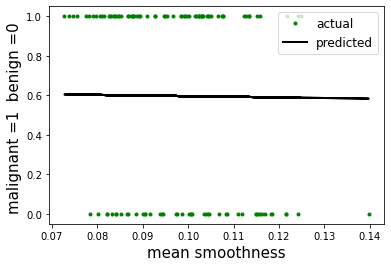

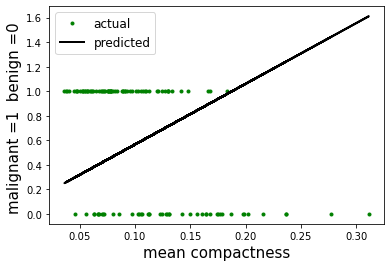

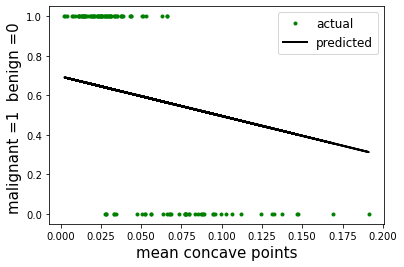

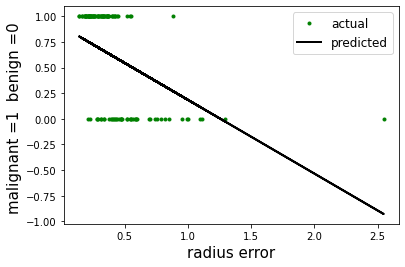

In [83]:
def plot_feature(k):

    x=[]
    y=[]
    yp=[]
    for i in range(len(x_test)):
        x.append(x_test[i][k])
        y.append(y_test[i])
    N=len(x_test)
    sum=0
    for i in range(N):
        sum=sum+(y_test[i] - wlin[k]*x_test[i][k])

    b = (1/N)*sum
    for i in range(N):
        yp.append(wlin[k]*x_test[i][k] + b)

    plt.plot(x, y, color='green', linewidth = 0, marker='o', markerfacecolor='green', markersize=3,label="actual")
    plt.plot(x, yp, color='black', linewidth = 2, marker='o',markerfacecolor='black', markersize=0,label="predicted")
    plt.xlabel(breast_cancer.feature_names[k-1],fontsize=15)
    plt.ylabel("malignant =1  benign =0 ",fontsize=15)
    plt.legend(fontsize=12)
    plt.show()


plot_feature(5)
plot_feature(6)
plot_feature(8)
plot_feature(11)